In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
df = pd.read_csv('C:/Users/ASUS/Downloads/Titanic-Dataset.csv')  

1. Eksplorasi awal

In [48]:
# a. Jumlah total penumpang
total_passengers = len(df)
print(f"Jumlah total penumpang: {total_passengers}")

Jumlah total penumpang: 891


In [49]:
# b. Jumlah penumpang yang selamat dan tidak selamat
survival_counts = df['Survived'].value_counts().rename(index={0: 'Not Survived', 1: 'Survived'})
print("\nJumlah penumpang yang selamat dan tidak selamat:")
print(survival_counts)


Jumlah penumpang yang selamat dan tidak selamat:
Survived
Not Survived    549
Survived        342
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6688\1482525675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='pastel')


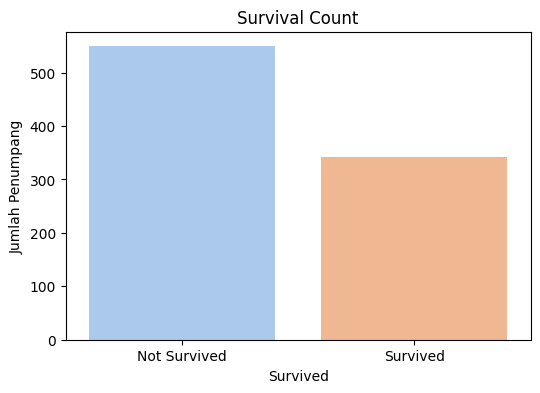

In [50]:
# Visualisasi jumlah selamat
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.ylabel('Jumlah Penumpang')
plt.show()


In [51]:
# c. Rata-rata umur, termuda, dan tertua
average_age = df['Age'].mean()
youngest_passenger = df.loc[df['Age'].idxmin()]
oldest_passenger = df.loc[df['Age'].idxmax()]

print(f"\nRata-rata umur penumpang: {average_age:.2f} tahun")
print(f"Penumpang termuda: {youngest_passenger['Name']} ({youngest_passenger['Age']} tahun)")
print(f"Penumpang tertua: {oldest_passenger['Name']} ({oldest_passenger['Age']} tahun)")


Rata-rata umur penumpang: 29.70 tahun
Penumpang termuda: Thomas, Master. Assad Alexander (0.42 tahun)
Penumpang tertua: Barkworth, Mr. Algernon Henry Wilson (80.0 tahun)


In [52]:
# d. Jumlah penumpang berdasarkan jenis kelamin
gender_counts = df['Sex'].value_counts()
print("\nJumlah penumpang berdasarkan jenis kelamin:")
print(gender_counts)


Jumlah penumpang berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6688\3190433203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='Set2')


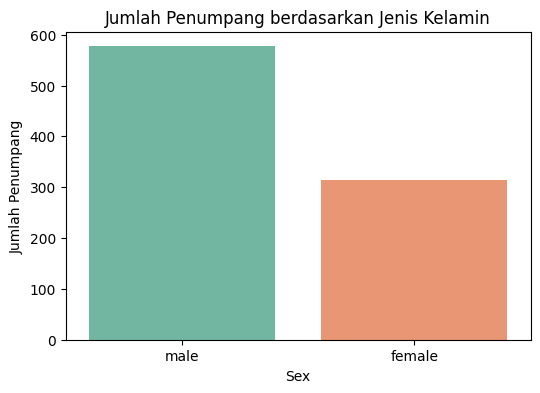

In [53]:
# Visualisasi jenis kelamin
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', palette='Set2')
plt.title('Jumlah Penumpang berdasarkan Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.show()


In [54]:
# e. Jumlah penumpang berdasarkan kelas dan persentase kelas 1
pclass_counts = df['Pclass'].value_counts().sort_index()
pclass1_percentage = (pclass_counts[1] / total_passengers) * 100
print("\nJumlah penumpang berdasarkan kelas:")
print(pclass_counts)
print(f"\nPersentase penumpang di kelas 1: {pclass1_percentage:.2f}%")


Jumlah penumpang berdasarkan kelas:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Persentase penumpang di kelas 1: 24.24%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6688\2240049413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Set3')


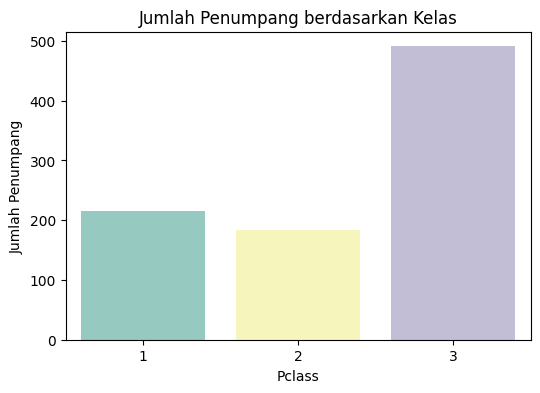

In [55]:
# Visualisasi kelas
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', palette='Set3')
plt.title('Jumlah Penumpang berdasarkan Kelas')
plt.ylabel('Jumlah Penumpang')
plt.show()

2. Prepocessing

In [56]:
# a.Mengecek jumlah missing value di setiap kolom
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [57]:
# 2b
# Mengisi nilai NaN pada kolom 'Age' dengan rata-rata
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Mengisi kolom 'Embarked' dengan modus (nilai terbanyak)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Menghapus kolom 'Cabin' karena banyak nilai hilang
df.drop(columns='Cabin', inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6688\3488415381.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6688\3488415381.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

2c. Outlier adalah nilai yang sangat berbeda dari sebagian besar data lainnya. Biasanya terlihat jelas di boxplot.

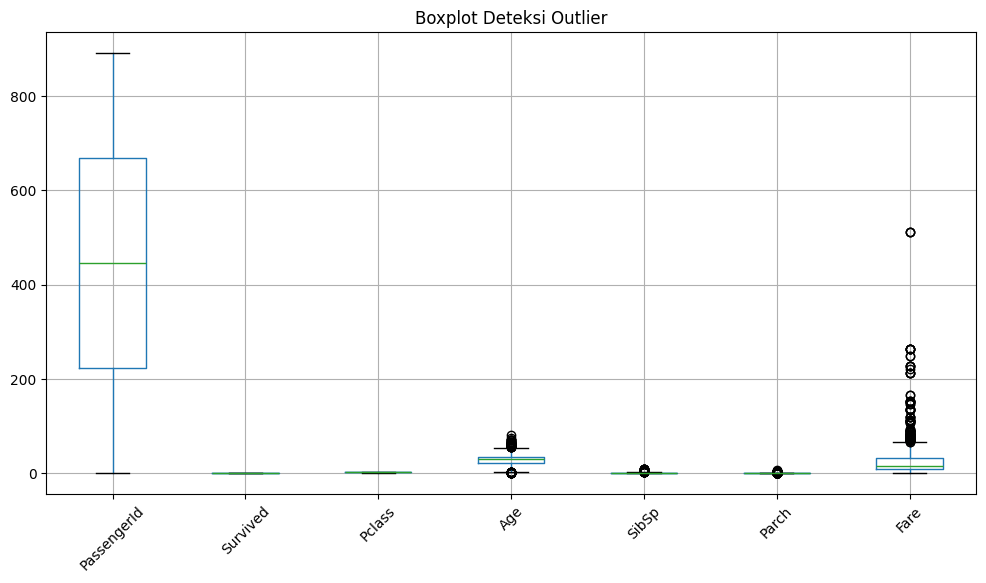

In [58]:
# Buat boxplot untuk fitur numerik
df.select_dtypes(include=['float64', 'int64']).boxplot(figsize=(12,6))
plt.title('Boxplot Deteksi Outlier')
plt.xticks(rotation=45)
plt.show()


2d. Jika data outlier masuk akal (misalnya umur 80 masih mungkin), tidak perlu dihapus. Tapi kalau outlier memengaruhi model, bisa diatasi .

In [59]:
# Menghapus outlier berdasarkan batas IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Menyaring data tanpa outlier ekstrem
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]


Jumlah data sebelum menghapus outlier: 775
Jumlah data setelah menghapus outlier: 750


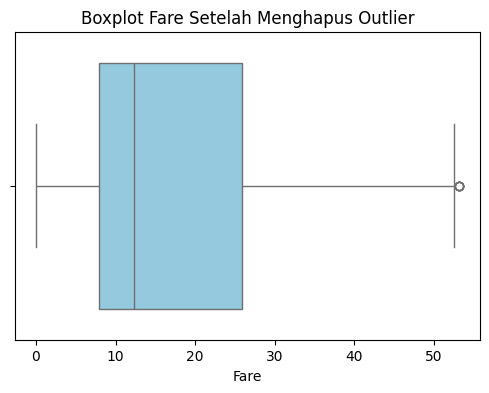

In [60]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Filter data tanpa outlier ekstrem
filtered_df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]

# Jumlah data sebelum dan sesudah
print(f"Jumlah data sebelum menghapus outlier: {len(df)}")
print(f"Jumlah data setelah menghapus outlier: {len(filtered_df)}")

# Visualisasi boxplot setelah menghapus outlier
plt.figure(figsize=(6,4))
sns.boxplot(data=filtered_df, x='Fare', color='skyblue')
plt.title('Boxplot Fare Setelah Menghapus Outlier')
plt.show()


In [61]:
# 2d melakukan scalling
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

3. Modelling

3a. - Training set digunakan untuk melatih model.
    - Testing set digunakan untuk menguji seberapa baik model dapat memprediksi data yang belum pernah dilihat sebelumnya.
    Karena jika model hanya diuji pada data yang sama dengan yang dipakai saat melatih, maka kita tidak tahu apakah model benar-benar "belajar" atau hanya "menghafal"

3b. Presentasi pembagiannya biasanya yaitu:
    - 80% untuk training
    - 20% untuk testing
    karena memberikan cukup banyak data bagi model untuk belajar pola (training), dan cukup data juga untuk menguji generalisasi model (testing).

In [62]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})  
y = df['Survived']

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test 


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6688\2363773655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})


(     Pclass  Sex       Age      Fare
 147       3    1 -1.574091  1.219877
 868       3    0  0.046606 -0.613302
 60        3    0 -0.556219 -0.780650
 468       3    0  0.046606 -0.744112
 777       3    1 -1.887282 -0.394057
 ..      ...  ...       ...       ...
 79        3    1  0.070164 -0.394057
 116       3    0  3.241228 -0.742269
 308       2    0  0.070164  0.455285
 502       3    1  0.046606 -0.751172
 112       3    0 -0.556219 -0.720161
 
 [620 rows x 4 columns],
      Pclass  Sex       Age      Fare
 493       1    0  3.280377  2.334834
 821       3    0 -0.164729 -0.675022
 381       3    1 -2.200474 -0.153316
 881       3    0  0.305058 -0.731524
 420       3    0  0.046606 -0.731524
 ..      ...  ...       ...       ...
 164       3    0 -2.200474  1.611385
 384       3    0  0.046606 -0.731524
 535       2    1 -1.730687  0.621100
 339       1    0  1.244632  1.302785
 657       3    1  0.226760 -0.171128
 
 [155 rows x 4 columns],
 147    0
 868    0
 60     0
 468

3c. Tiga Algoritma Klasifikasi
 1. Logistic Regression
    - Cocok untuk klasifikasi biner.
    - Menggunakan fungsi sigmoid untuk memetakan nilai ke probabilitas.
 2. K-Nearest Neighbors (KNN)
    - Klasifikasi berdasarkan mayoritas tetangga terdekat
    - Simpel dan intuitif.
 3. Random Forest
    - Gabungan banyak decision tree.
    - Lebih stabil, mengurangi overfitting.

In [63]:
# Preprocessing
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fitur dan target
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
logreg = LogisticRegression(max_iter=200)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Prediksi
y_pred_log = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Lihat contoh hasil prediksi
print("Logistic Regression:", y_pred_log[:5])
print("KNN:", y_pred_knn[:5])
print("Random Forest:", y_pred_rf[:5])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6688\1804313793.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6688\1804313793.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Logistic Regression: [0 0 1 0 0]
KNN: [0 0 1 0 0]
Random Forest: [0 0 1 0 0]


3d. Evaluasi Model
    Metrik evaluasi:
    - Accuracy: Persentase prediksi yang benar.
    - Precision: Dari semua yang diprediksi positif, berapa yang benar.
    - Recall: Dari semua yang benar-benar positif, berapa yang berhasil diprediksi.
    - F1 Score: Gabungan precision dan recall.

In [64]:
# Prediksi
y_pred_log = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluasi
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))
print("KNN:\n", classification_report(y_test, y_pred_knn))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        95
           1       0.73      0.62      0.67        60

    accuracy                           0.76       155
   macro avg       0.75      0.73      0.74       155
weighted avg       0.76      0.76      0.76       155

KNN:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        95
           1       0.74      0.62      0.67        60

    accuracy                           0.77       155
   macro avg       0.76      0.74      0.75       155
weighted avg       0.77      0.77      0.76       155

Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        95
           1       0.70      0.67      0.68        60

    accuracy                           0.76       155
   macro avg       0.75      0.74      0.75       155
weighted avg       0.76      0

3e. Perbandingan dan Ulasan
    KNN memberikan performa terbaik di antara ketiga model (Logistic Regression, KNN, Random Forest). Ini bisa terlihat dari metrik evaluasi seperti accuracy, precision, recall, dan terutama F1-score yang paling tinggi.
    KNN bisa memberikan hasil terbaik pada dataset Titanic karena sifat datanya yang relatif sederhana dan memiliki pola yang jelas, seperti penumpang wanita dan anak-anak yang cenderung selamat. Metode KNN tidak membuat asumsi khusus terhadap distribusi data, sehingga cocok untuk data seperti ini. Selain itu, ukuran dataset yang tidak terlalu besar membuat proses pencarian tetangga terdekat berjalan efisien. Dengan fitur yang telah diproses dengan baik dan tanpa banyak outlier, KNN mampu memanfaatkan kedekatan antar data untuk menghasilkan prediksi yang akurat.

4. Evaluasi

In [71]:
from sklearn.metrics import classification_report

# classification report untuk Random Forest
report = classification_report(y_test, y_pred_rf, target_names=['Tidak Selamat', 'Selamat'], output_dict=True)

# Ambil precision dan recall untuk label "Selamat"
precision_selamat = report['Selamat']['precision']
recall_selamat = report['Selamat']['recall']

# Tampilkan hasil
print("Classification Report, Random Forest")
print(f"Precision (Selamat): {precision_selamat:.3f}")
print(f"Recall    (Selamat): {recall_selamat:.3f}")

Classification Report, Random Forest
Precision (Selamat): 0.702
Recall    (Selamat): 0.667


In [70]:
# jumlah penumpang yang diprediksi selamat (label = 1)
predicted_selamat = (y_pred_rf == 1).sum()

# jumlah penumpang yang diprediksi selamat dan benar-benar selamat
true_positives = ((y_pred_rf == 1) & (y_test == 1)).sum()

print(f"Total penumpang yang diprediksi selamat: {predicted_selamat}")
print(f"Total penumpang yang benar-benar selamat dari prediksi tersebut: {true_positives}")

Total penumpang yang diprediksi selamat: 57
Total penumpang yang benar-benar selamat dari prediksi tersebut: 40
